Customer Data:
  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567879652   
1       C1002     John            Sydney         john@gmail.com  9987324567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9699834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                   fg.road     90001  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3            24-2 Sendagaya       849  
4  1520 E Buena Vista Drive     32830  

Product Data:
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    Furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     Computer         60000.0   
2       P104   Smartphone  Electronics    

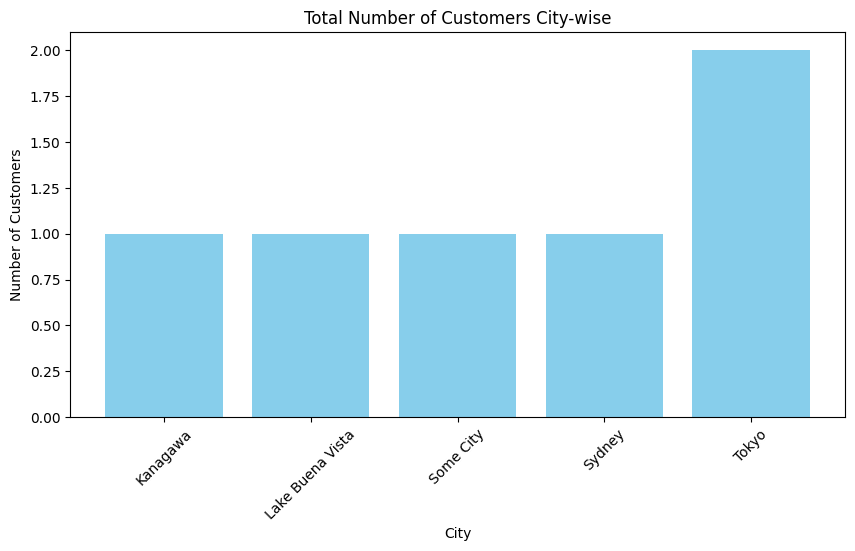

Most frequent customers:
  customer_id  order_count
0       C1004            2
1       C1005            2
2       C1006            1


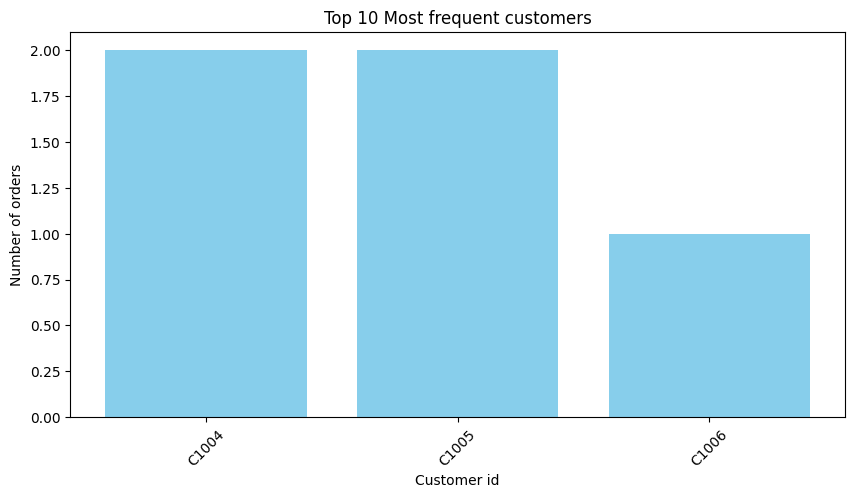


Total number of products by category:
      category  total_products
0    Appliance               1
1  Electronics               3
2    Furniture               2


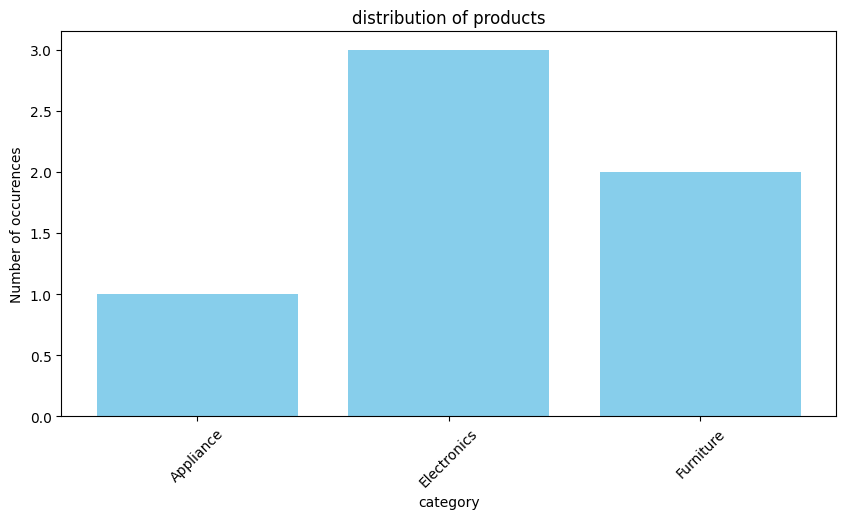


Distribution of products across sub-categories:
  sub_category  total_products
0       Chairs               2
1     Computer               1
2    Computers               1
3  Electronics               1
4        Phone               1


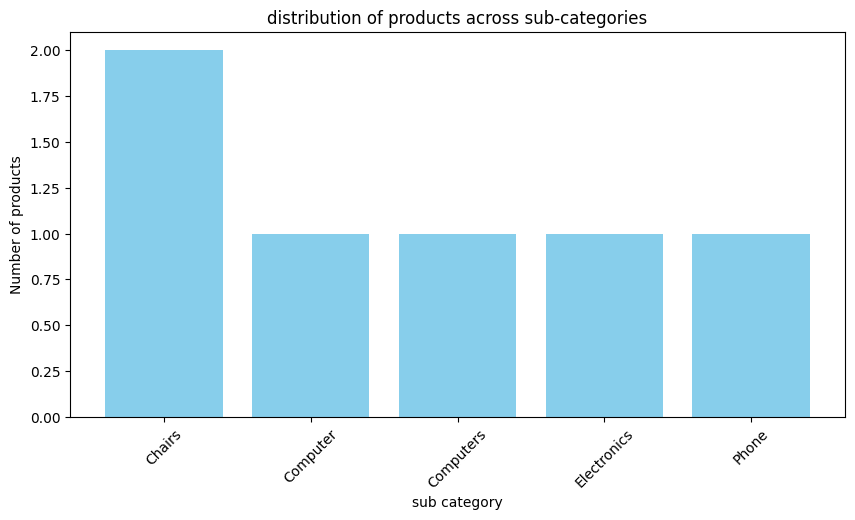


Products with low stock levels:
Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []


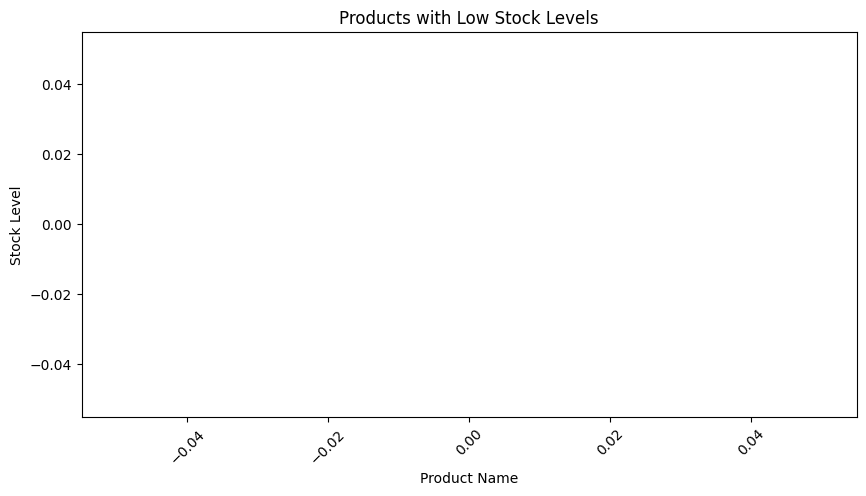


Product price statistics (average, max, min):
mean    30908.333333
max     55000.000000
min       450.000000
Name: selling_price, dtype: float64

Top 10 orders product-wise:
  product_id  total_price
0       P106     110000.0
1       P102      35000.0
2       P112      15000.0


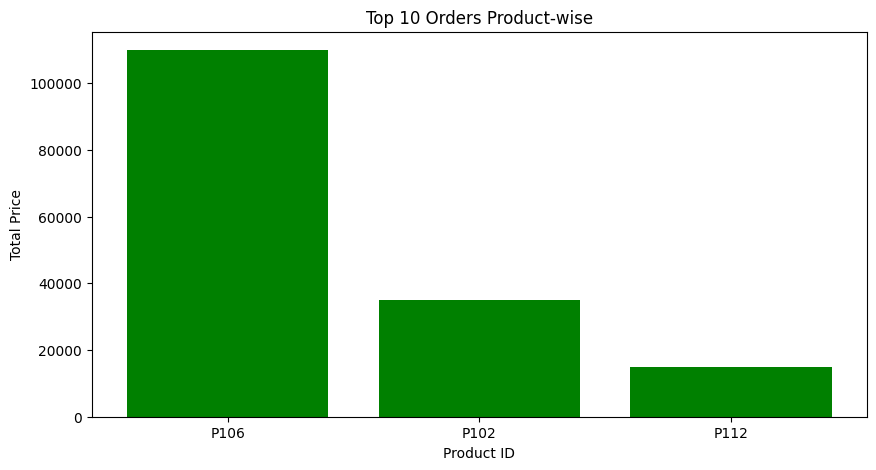


Order status distribution:
  order_status  count
0    Delivered      3
1      Pending      2


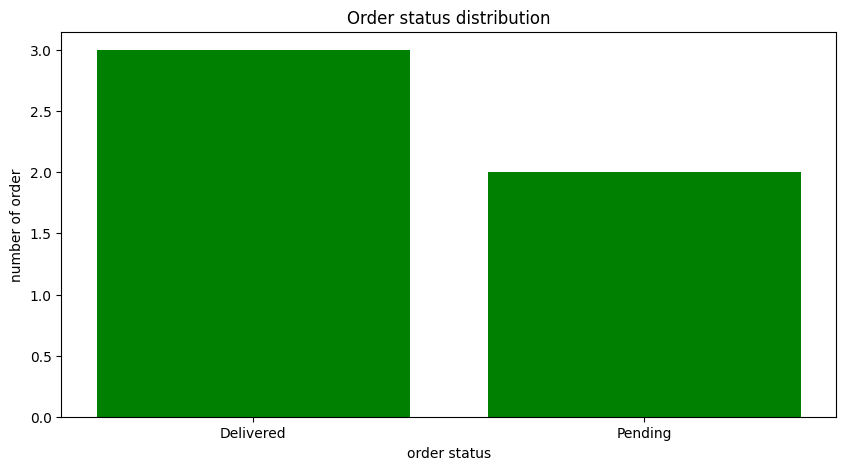


Most popular products based on order quantity:
  product_id  quantity
0       P102       2.0
1       P106       2.0
2       P112       1.0

Total revenue generated from orders product-wise:
  product_id  total_price
0       P102      35000.0
1       P106     110000.0
2       P112      15000.0


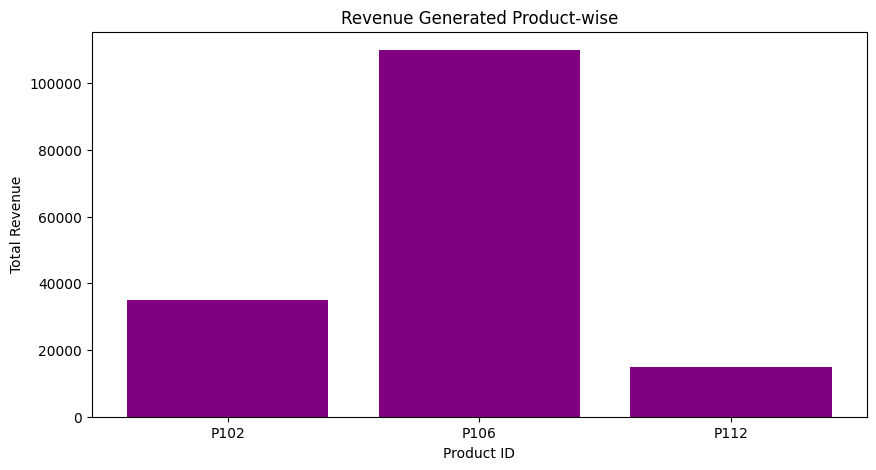


Total revenue generated from all orders: 160000.0

Total revenue by product category (percentage):
category
Electronics    68.75
Furniture      31.25
Name: total_price, dtype: float64


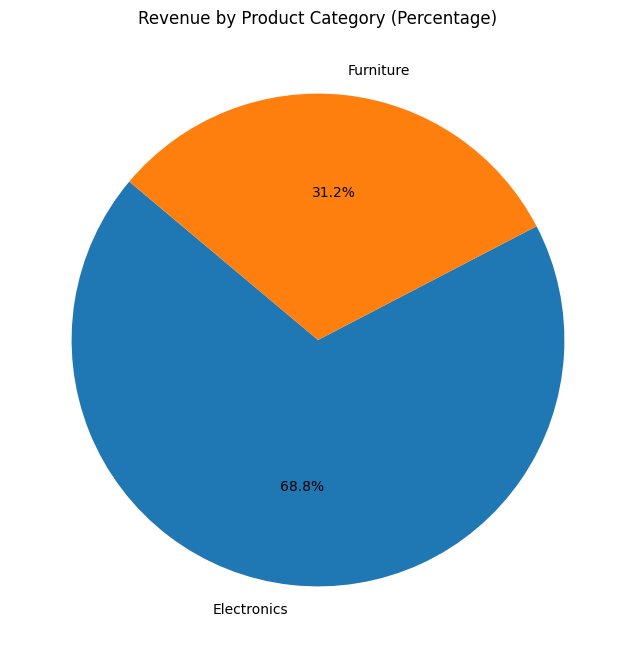


Performance of different product categories:
      category  total_price
0  Electronics     110000.0
1    Furniture      50000.0

Most profitable products:
  product_name   profit
0        Chair -15000.0
1    Laptop HP -24400.0


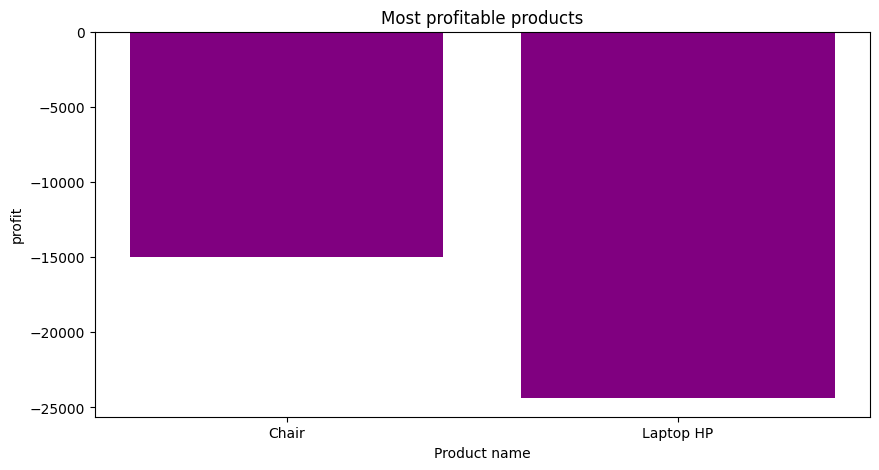


Product with the highest order quantity:
  product_name  quantity
0        Chair       3.0

Product with the lowest order quantity:
  product_name  quantity
1    Laptop HP       2.0

Customer with the highest order quantity:
   name  quantity
0  Jack       2.0

Customer with the lowest order quantity:
            name  quantity
2  Some Customer       1.0

Most preferred payment modes:
  payment_mode  count
0          COD      5

Month-wise total sales:
  order_date  total_price
0    2023-11      15000.0
1    2023-12     145000.0


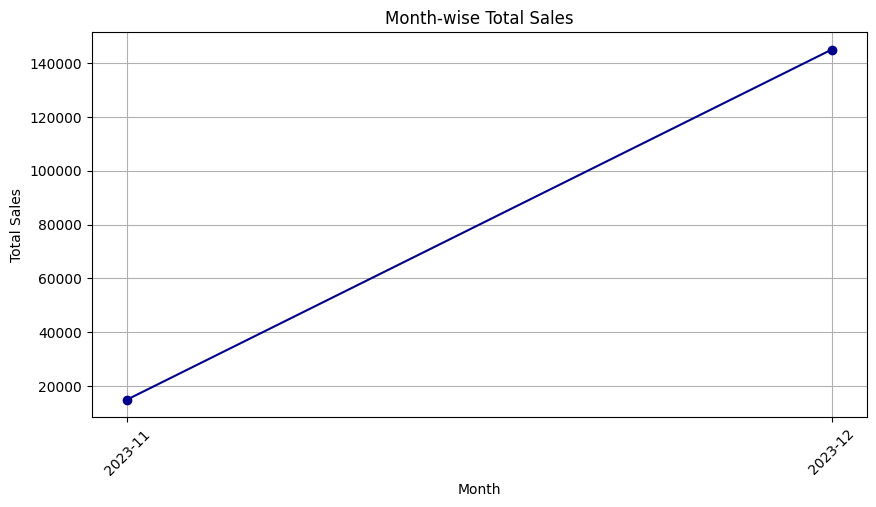


Month and year-wise total sales:
  order_date  total_price
0    2023-11      15000.0
1    2023-12     145000.0

Peak order date:
2023-12-01 00:00:00

Distribution of customers across different cities:
               city  total_customers
0             Tokyo                2
1            Sydney                1
2          Kanagawa                1
3  Lake Buena Vista                1
4         Some City                1

Products more popular in specific cities:
               city product_name  quantity
0  Lake Buena Vista        Chair       1.0
1  Lake Buena Vista    Laptop HP       1.0
2         Some City        Chair       1.0
3             Tokyo        Chair       1.0
4             Tokyo    Laptop HP       1.0


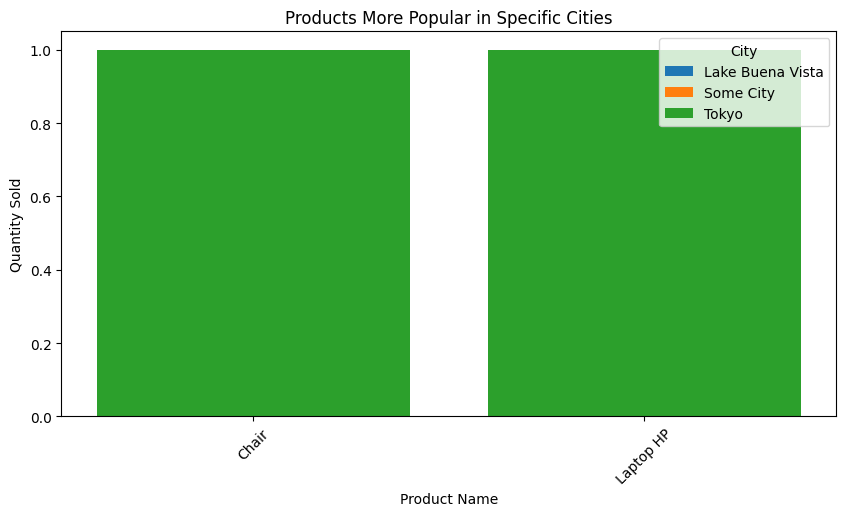


Top 10 best-selling products:
  product_name  quantity
0        Chair       3.0
1    Laptop HP       2.0

Top 10 slow-moving products:
  product_name  quantity
0    Laptop HP       2.0
1        Chair       3.0

Repeat customers:
  customer_id  order_count
0       C1004            2
1       C1005            2

Customer retention rate: 33.33333333333333

Payment status (successful, pending):
  order_status  count
0    Delivered      3
1      Pending      2


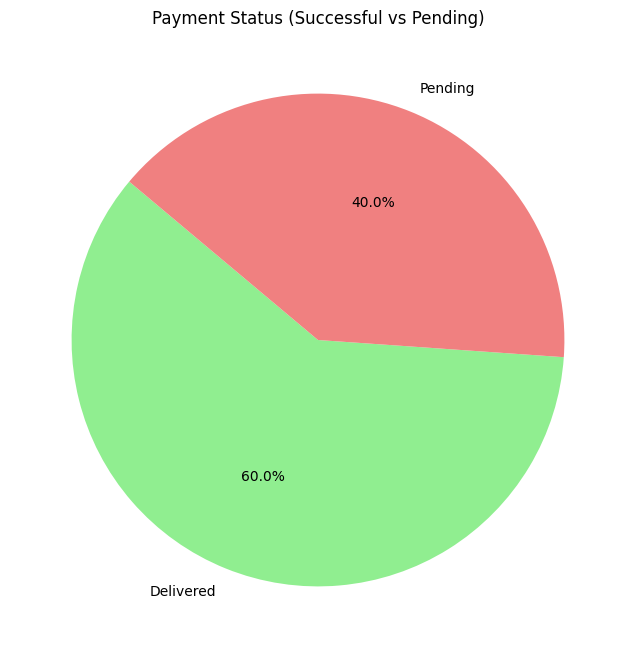

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conection =mysql.connector.connect(
    user='root',
    password='2002',
    host='localhost',
    database='ecommerce'
    )
cursor=conection.cursor()

# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')

#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Close the cursor and connection
cursor.close()
conection.close()

print("Customer Data:")
print(customer_data.head())
print("\nProduct Data:")
print(product_data.head())
print("\nOrder Details Data:")
print(order_data.head())
print(product_data.columns)

# ------------------ Customer Analysis ------------------ #
# Total number of customers city-wise
customers_citywise = customer_data.groupby('city').size().reset_index(name='total_customers')
print("Total number of customers city-wise:")
print(customers_citywise)
# Bar Chart for city-wise customer distribution
plt.figure(figsize=(10, 5))
plt.bar(customers_citywise['city'], customers_citywise['total_customers'], color='skyblue')
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Most frequent customers based on order history
customer_order_count = order_data.groupby('customer_id').size().reset_index(name='order_count')
most_frequent_customers = customer_order_count.nlargest(10, 'order_count')
print("Most frequent customers:")
print(most_frequent_customers)
# Bar Chart for Top 10 Most frequent customers
plt.figure(figsize=(10, 5))
plt.bar(customer_order_count['customer_id'], customer_order_count['order_count'], color='skyblue')
plt.title('Top 10 Most frequent customers')
plt.xlabel('Customer id')
plt.ylabel('Number of orders')
plt.xticks(rotation=45)
plt.show()

# ------------------ Product Analysis ------------------ #
# Total number of products by category
products_by_category = product_data.groupby('category').size().reset_index(name='total_products')
print("\nTotal number of products by category:")
print(products_by_category)
# Bar Chart for distribution of products
plt.figure(figsize=(10, 5))
plt.bar(products_by_category['category'], products_by_category['total_products'], color='skyblue')
plt.title('distribution of products')
plt.xlabel('category')
plt.ylabel('Number of occurences')
plt.xticks(rotation=45)
plt.show()

# Distribution of products across sub-categories
products_by_subcategory = product_data.groupby('sub_category').size().reset_index(name='total_products')
print("\nDistribution of products across sub-categories:")
print(products_by_subcategory)
# Bar Chart for distribution of products across sub-categories
plt.figure(figsize=(10, 5))
plt.bar(products_by_subcategory['sub_category'], products_by_subcategory['total_products'], color='skyblue')
plt.title('distribution of products across sub-categories')
plt.xlabel('sub category')
plt.ylabel('Number of products')
plt.xticks(rotation=45)
plt.show()

# Products with low stock levels (assume a threshold of 10 units)
low_stock_products = product_data[product_data['stock'] < 10]
print("\nProducts with low stock levels:")
print(low_stock_products)
# Bar Chart: Low stock products
plt.figure(figsize=(10, 5))
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='red')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.show()

# Average, maximum, and minimum prices for products
price_stats = product_data['selling_price'].agg(['mean', 'max', 'min'])
print("\nProduct price statistics (average, max, min):")
print(price_stats)

# ------------------ Order Analysis ------------------ #
# Top 10 orders product-wise
top_10_orders = order_data.groupby('product_id')['total_price'].sum().nlargest(10).reset_index()
print("\nTop 10 orders product-wise:")
print(top_10_orders)
# Bar Chart for top 10 orders product-wise
plt.figure(figsize=(10, 5))
plt.bar(top_10_orders['product_id'], top_10_orders['total_price'], color='green')
plt.title('Top 10 Orders Product-wise')
plt.xlabel('Product ID')
plt.ylabel('Total Price')
plt.show()

# Order status distribution (pending, delivered, etc.)
order_status_distribution = order_data['order_status'].value_counts().reset_index(name='count')
print("\nOrder status distribution:")
print(order_status_distribution)
# Bar Chart for Order status distribution
plt.figure(figsize=(10, 5))
plt.bar(order_status_distribution['order_status'], order_status_distribution['count'], color='green')
plt.title('Order status distribution')
plt.xlabel('order status')
plt.ylabel('number of order')
plt.show()

# Most popular products based on order quantity
popular_products = order_data.groupby('product_id')['quantity'].sum().nlargest(10).reset_index()
print("\nMost popular products based on order quantity:")
print(popular_products)

# ------------------ Sales Analysis ------------------ #
# Total revenue generated from orders product-wise
revenue_productwise = order_data.groupby('product_id')['total_price'].sum().reset_index()
print("\nTotal revenue generated from orders product-wise:")
print(revenue_productwise)
# Bar Chart: Revenue product-wise
plt.figure(figsize=(10, 5))
plt.bar(revenue_productwise['product_id'], revenue_productwise['total_price'], color='purple')
plt.title('Revenue Generated Product-wise')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.show()

# Total revenue generated from all orders
total_revenue = order_data['total_price'].sum()
print("\nTotal revenue generated from all orders:", total_revenue)


# Total revenue by product category percentage
merged_data1 = pd.merge(order_data, product_data, on='product_id')
category_revenue = merged_data1.groupby('category')['total_price'].sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100
print("\nTotal revenue by product category (percentage):")
print(category_revenue_percentage)
# Pie Chart: Revenue by product category (percentage)
merged_data1 = pd.merge(order_data, product_data, on='product_id')
category_revenue = merged_data1.groupby('category')['total_price'].sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100
plt.figure(figsize=(8, 8))
plt.pie(category_revenue_percentage, labels=category_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Product Category (Percentage)')
plt.show()

# Performance of different product categories in terms of sales
category_performance = merged_data1.groupby('category')['total_price'].sum().reset_index()
print("\nPerformance of different product categories:")
print(category_performance)

# Most profitable products based on difference between original and selling prices
merged_data1['profit'] = merged_data1['selling_price'] - merged_data1['original_price'] * merged_data1['quantity']
most_profitable_products = merged_data1.groupby('product_name')['profit'].sum().nlargest(10).reset_index()
print("\nMost profitable products:")
print(most_profitable_products)
# Bar Chart: Most profitable products
plt.figure(figsize=(10, 5))
plt.bar(most_profitable_products['product_name'], most_profitable_products['profit'], color='purple')
plt.title('Most profitable products')
plt.xlabel('Product name')
plt.ylabel('profit')
plt.show()

# ------------------ Customer Order Patterns ------------------ #
# Product names with the highest and lowest order quantities
product_order_quantity = merged_data1.groupby('product_name')['quantity'].sum().reset_index()
highest_ordered_product = product_order_quantity.nlargest(1, 'quantity')
lowest_ordered_product = product_order_quantity.nsmallest(1, 'quantity')
print("\nProduct with the highest order quantity:")
print(highest_ordered_product)
print("\nProduct with the lowest order quantity:")
print(lowest_ordered_product)


# Customers with the highest and lowest order quantities by name
merged_data2 = pd.merge(order_data, customer_data, on='customer_id')
customer_order_quantity = merged_data2.groupby('name')['quantity'].sum().reset_index()
highest_ordered_customer = customer_order_quantity.nlargest(1, 'quantity')
lowest_ordered_customer = customer_order_quantity.nsmallest(1, 'quantity')
print("\nCustomer with the highest order quantity:")
print(highest_ordered_customer)
print("\nCustomer with the lowest order quantity:")
print(lowest_ordered_customer)

# Most preferred payment modes
preferred_payment_modes = order_data['payment_mode'].value_counts().reset_index(name='count')
print("\nMost preferred payment modes:")
print(preferred_payment_modes)

# ------------------ Time-based Analysis ------------------ #
# Month-wise total sales
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
monthwise_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum().reset_index()
print("\nMonth-wise total sales:")
print(monthwise_sales)
# Line Chart: Month-wise total sales
plt.figure(figsize=(10, 5))
plt.plot(monthwise_sales['order_date'].astype(str), monthwise_sales['total_price'], marker='o', color='darkblue')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Month and year-wise total sales
month_year_sales = order_data.groupby(order_data['order_date'].dt.to_period('M'))['total_price'].sum().reset_index()
print("\nMonth and year-wise total sales:")
print(month_year_sales)

# Peak order date
peak_order_date = order_data.groupby('order_date')['quantity'].sum().idxmax()
print("\nPeak order date:")
print(peak_order_date)

# ------------------ Geographical Analysis ------------------ #
# Distribution of customers across cities
customer_distribution_city = customer_data['city'].value_counts().reset_index(name='total_customers')
print("\nDistribution of customers across different cities:")
print(customer_distribution_city)

# Products/categories more popular in specific cities
final_merged_data = pd.merge(merged_data2, product_data, on='product_id')

popular_products_citywise = final_merged_data.groupby(['city', 'product_name'])['quantity'].sum().reset_index()
print("\nProducts more popular in specific cities:")
print(popular_products_citywise)
# Bar Chart: Products more popular in specific cities
plt.figure(figsize=(10, 5))
for city in popular_products_citywise['city'].unique():
    city_data = popular_products_citywise[popular_products_citywise['city'] == city]
    plt.bar(city_data['product_name'], city_data['quantity'], label=city)
plt.title('Products More Popular in Specific Cities')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title="City")
plt.show()

# ------------------ Product Performance ------------------ #
# Top 10 best-selling products
best_selling_products = merged_data1.groupby('product_name')['quantity'].sum().nlargest(10).reset_index()
print("\nTop 10 best-selling products:")
print(best_selling_products)

# Top 10 slow-moving products (low sales)
slow_moving_products = merged_data1.groupby('product_name')['quantity'].sum().nsmallest(10).reset_index()
print("\nTop 10 slow-moving products:")
print(slow_moving_products)

# ------------------ Customer Retention ------------------ #
# Analyzing repeat customers and their order patterns
repeat_customers = customer_order_count[customer_order_count['order_count'] > 1]
print("\nRepeat customers:")
print(repeat_customers)

# Customer retention rates over time (percentage of repeat customers)
customer_retention_rate = (len(repeat_customers) / len(customer_data)) * 100
print("\nCustomer retention rate:", customer_retention_rate)

# ------------------ Payment Analysis ------------------ #
# Display successful and pending payments order counts
payment_status_count = order_data['order_status'].value_counts().reset_index(name='count')
print("\nPayment status (successful, pending):")
print(payment_status_count)
# Pie Chart: Payment status distribution
plt.figure(figsize=(8, 8))
plt.pie(payment_status_count['count'], 
        labels=payment_status_count.iloc[:, 0],  # Correctly accessing the first column
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['lightgreen', 'lightcoral'])
plt.title('Payment Status (Successful vs Pending)')
plt.show()
